In [1]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime, timedelta

# 設置MySQL資料庫連接
db_user = 'root'
db_password = '19970730'
db_host = '127.0.0.1'
db_name = 'sql_stock'

# 創建資料庫連接引擎
engine = create_engine(f'mysql+mysqlconnector://{db_user}:{db_password}@{db_host}/{db_name}')

# 設置日期範圍
#today = datetime(2024, 5, 25)
today = datetime.now().date()
#one_year_ago = today - timedelta(days=365)
one_year_ago = today - timedelta(days=730) #兩年看看

# 格式化日期
today_str = today.strftime('%Y%m%d')
one_year_ago_str = one_year_ago.strftime('%Y%m%d')
#直接看到2020
one_year_ago_str = '20200101'


# SQL 查詢 加權指數
query_twse = f"""
SELECT *
FROM daily_twse
WHERE date >= '{one_year_ago_str}' AND date <= '{today_str}'
"""

# SQL 查詢 個股
query_updown = f"""
SELECT *
FROM daily_updown
WHERE date >= '{one_year_ago_str}' AND date <= '{today_str}'
"""

# 使用 pd.read_sql 來執行查詢並讀取數據到 DataFrame
twse_df_raw = pd.read_sql(query_twse, engine)
twse_updown_raw = pd.read_sql(query_updown, engine)


In [2]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime, timedelta

def fetch_stock_data(start_date: str, end_date: str):
    # 設置MySQL資料庫連接
    db_user = 'root'
    db_password = '19970730'
    db_host = '127.0.0.1'
    db_name = 'sql_stock'

    # 創建資料庫連接引擎
    engine = create_engine(f'mysql+mysqlconnector://{db_user}:{db_password}@{db_host}/{db_name}')
    
    # SQL 查詢 加權指數
    query_twse = f"""
    SELECT *
    FROM daily_twse
    WHERE date >= '{start_date}' AND date <= '{end_date}'
    """

    # SQL 查詢 個股
    query_updown = f"""
    SELECT *
    FROM daily_updown
    WHERE date >= '{start_date}' AND date <= '{end_date}'
    """

    # 執行查詢並返回 DataFrame
    twse_df_raw = pd.read_sql(query_twse, engine)
    twse_updown_raw = pd.read_sql(query_updown, engine)

    return twse_df_raw, twse_updown_raw

# 外部呼叫的範例
# 設置日期範圍
today = datetime.now().date()
two_years_ago = today - timedelta(days=730)

# 格式化日期
today_str = today.strftime('%Y%m%d')
two_years_ago_str = '20200101'  # 你可以靜態設置或者動態計算

# 呼叫函數來獲取資料
twse_df_raw, twse_updown_raw = fetch_stock_data(two_years_ago_str, today_str)


In [3]:
twse_updown_raw

,Date,上市上漲家數,上市漲停家數,上市下跌家數,上市跌停家數,上市持平家數,上市上漲下跌比,上櫃上漲家數,上櫃漲停家數,上櫃下跌家數,上櫃跌停家數,上櫃持平家數,上櫃上漲下跌比,總上漲家數,總漲停家數,總下跌家數,總跌停家數,總持平家數,總上漲下跌比
0,2020-01-02,606,7,208,0,123,2.91,430,6,212,0,110,2.03,1036,13,420,0,233,2.47
1,2020-01-03,262,1,571,1,104,0.46,164,1,511,2,73,0.32,426,2,1082,3,177,0.39
2,2020-01-06,157,1,705,2,74,0.22,148,1,519,2,86,0.29,305,2,1224,4,160,0.25
3,2020-01-07,276,3,557,2,106,0.50,216,4,460,1,76,0.47,492,7,1017,3,182,0.48
4,2020-01-08,166,3,697,0,78,0.24,169,3,495,2,85,0.34,335,6,1192,2,163,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2024-09-11,425,10,500,1,88,0.85,372,16,366,1,71,1.02,797,26,866,2,159,0.92
1142,2024-09-12,827,9,121,0,62,6.83,582,18,171,0,63,3.40,1409,27,292,0,125,4.83
1143,2024-09-13,681,19,242,0,89,2.81,507,15,226,0,82,2.24,1188,34,468,0,171,2.54
1144,2024-09-16,701,15,221,0,88,3.17,516,22,253,2,48,2.04,1217,37,474,2,136,2.57


In [4]:
# print(twse_updown_raw['總上漲下跌比'].describe())
# print(twse_updown_raw['上市上漲下跌比'].describe())
# print(twse_updown_raw['上櫃上漲下跌比'].describe())

twse_updown_5day =  twse_updown_raw.tail(5)[['Date','總上漲家數','總漲停家數', '總下跌家數', '總跌停家數', '總持平家數', '總上漲下跌比']]
twse_updown_5day['Date'] = twse_updown_5day['Date'].astype(str)
twse_updown_5day

,Date,總上漲家數,總漲停家數,總下跌家數,總跌停家數,總持平家數,總上漲下跌比
1141,2024-09-11,797,26,866,2,159,0.92
1142,2024-09-12,1409,27,292,0,125,4.83
1143,2024-09-13,1188,34,468,0,171,2.54
1144,2024-09-16,1217,37,474,2,136,2.57
1145,2024-09-18,591,37,1094,0,147,0.54


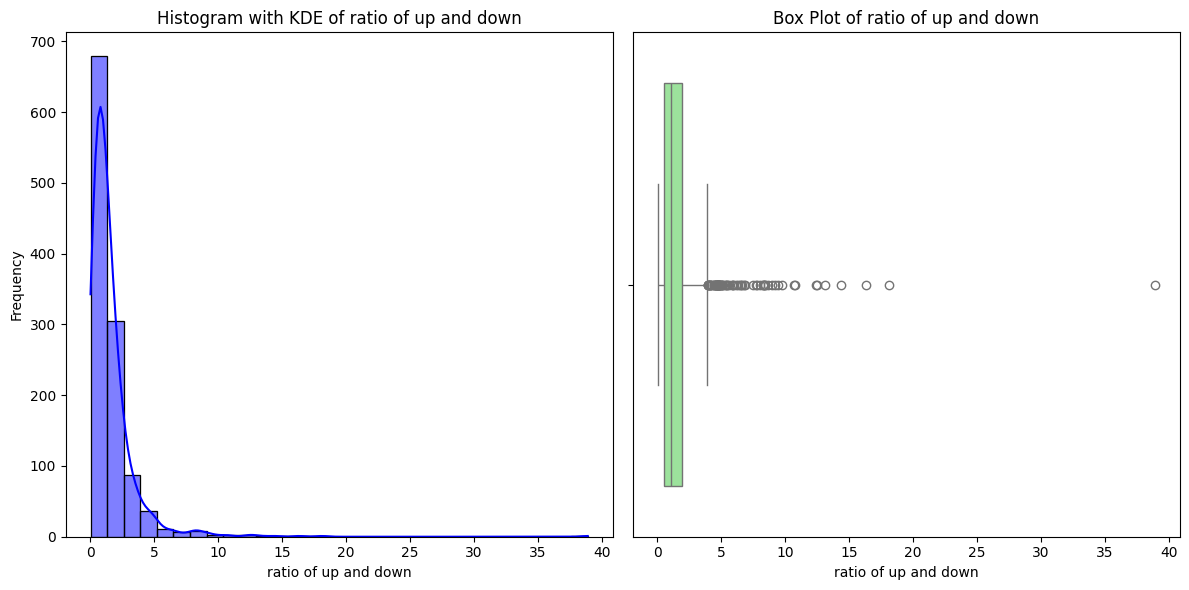

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假設你已經有一個 DataFrame twse_updown_raw
# twse_updown_raw = pd.read_csv('your_data.csv')

# 直方圖與密度圖
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(twse_updown_raw['總上漲下跌比'], bins=30, kde=True, color='blue')
plt.title('Histogram with KDE of ratio of up and down')
plt.xlabel('ratio of up and down')
plt.ylabel('Frequency')

# 箱型圖
plt.subplot(1, 2, 2)
sns.boxplot(x=twse_updown_raw['總上漲下跌比'], color='lightgreen')
plt.title('Box Plot of ratio of up and down')
plt.xlabel('ratio of up and down')

plt.tight_layout()
plt.show()

In [6]:
twse_index = twse_df_raw[twse_df_raw['指數名稱'] == '發行量加權股價指數'].copy()
twse_index['Date'] = pd.to_datetime(twse_index['Date'])

#twse_updown_raw[twse_updown_raw['上櫃上漲下跌比'] > 5]['Date']
twse_updown_raw.loc[:, '5MA'] = twse_updown_raw['總上漲下跌比'].rolling(10).mean()
# twse_updown_raw_na = twse_updown_raw[twse_updown_raw['上櫃上漲下跌比'] > 1.35] #['Date']
twse_updown_raw_na = twse_updown_raw.dropna()
twse_updown_raw_na['Date'] = pd.to_datetime(twse_updown_raw_na['Date'])


C:\Users\USER\AppData\Local\Temp\ipykernel_21396\36264237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twse_updown_raw_na['Date'] = pd.to_datetime(twse_updown_raw_na['Date'])


總上漲下跌比 5日平均量 如果大於3

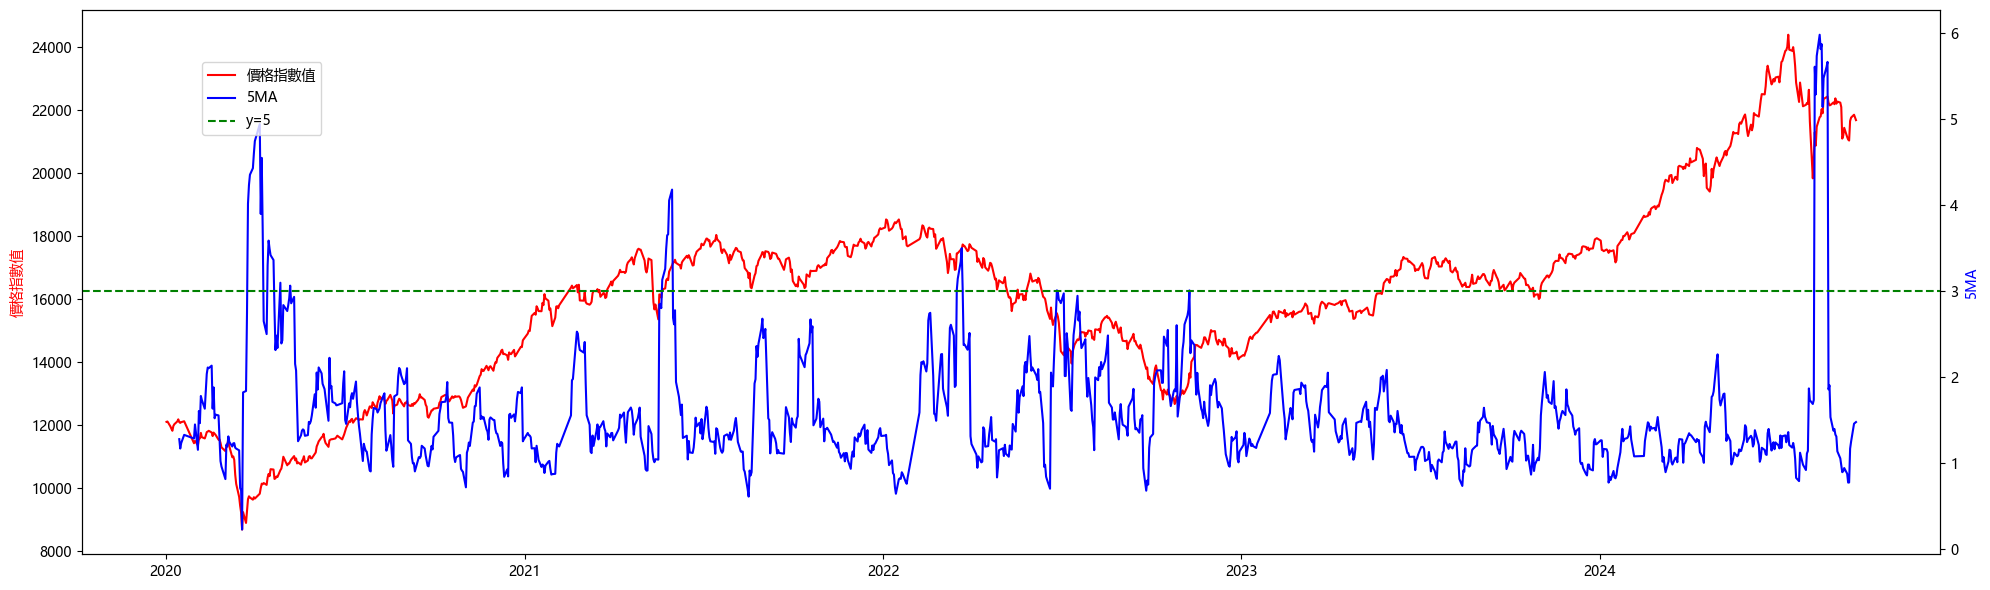

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# 禁用特定类型的警告
warnings.filterwarnings("ignore", category=UserWarning)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用 Microsoft YaHei 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 假設 twse_index 是你的 DataFrame
# twse_index = pd.read_csv('your_data.csv')

# 创建图表
fig, ax1 = plt.subplots(figsize=(20, 6))

# 绘制折线图
ax1.plot(twse_index['Date'], twse_index['價格指數值'], color='red', linestyle='-', label='價格指數值')

# 设置 x 轴的日期格式
# ax1.set_xticks(twse_index['Date'])
# ax1.set_xticklabels(twse_index['Date'], rotation=45)

# 设置第二个 y 轴的标签
ax1.set_ylabel('價格指數值', color='red')

# 创建第二个 y 轴
ax2 = ax1.twinx()

# 绘制 merged_hist 的折线图
ax2.plot(twse_updown_raw_na['Date'], twse_updown_raw_na['5MA'], color='blue', linestyle='-', label='5MA')
#ax2.set_xticks(twse_updown_raw_na['Date'])

# 设置第二个 y 轴的标签
ax2.set_ylabel('5MA', color='blue')

# 在 y=3 的位置畫一條橫線
ax2.axhline(y=3, color='green', linestyle='--', label='y=5')

# 添加图例
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# 自动调整布局以适应标签
fig.tight_layout()

# 显示图表
plt.show()

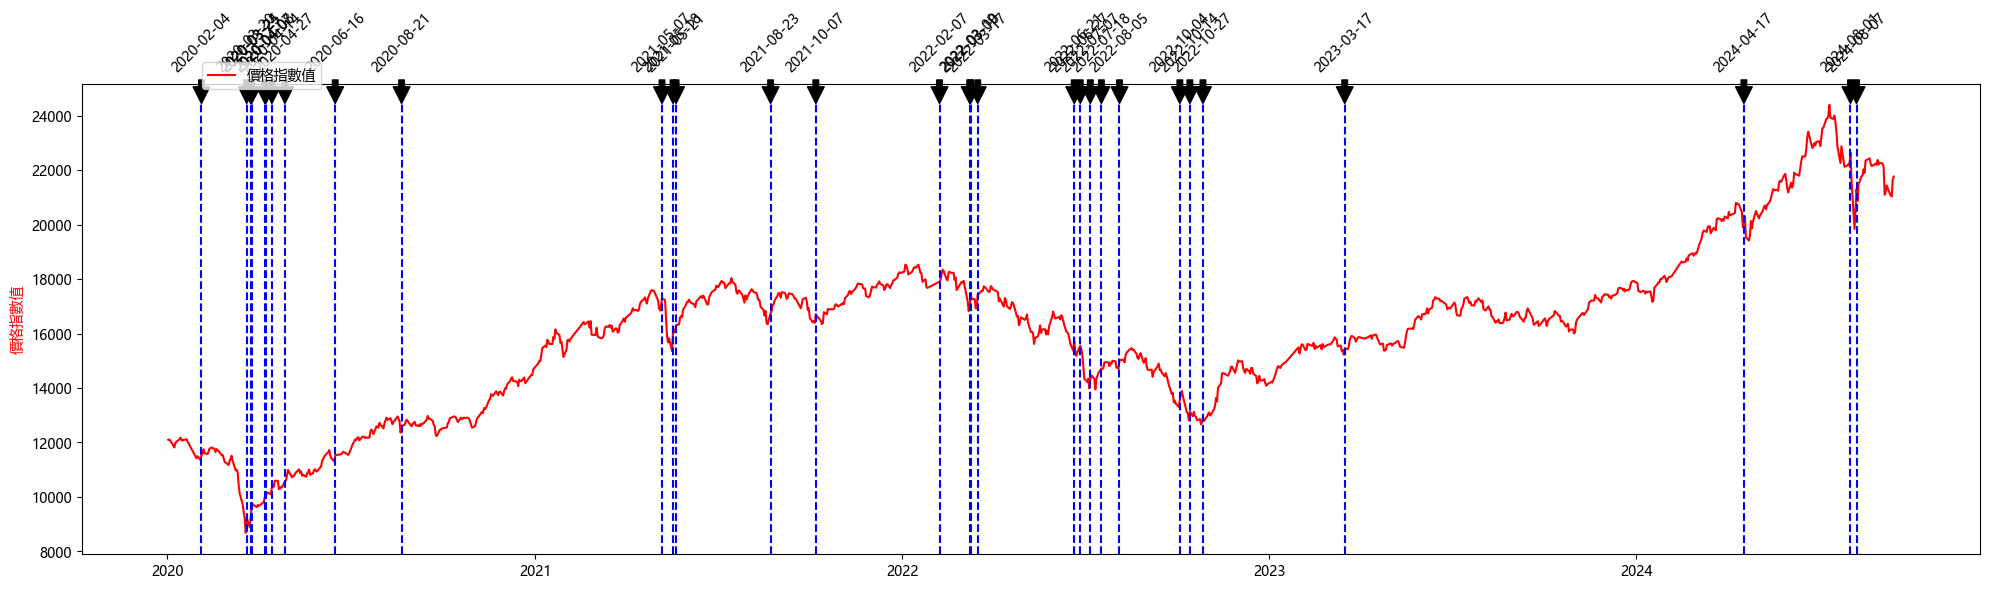

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# 禁用特定类型的警告
warnings.filterwarnings("ignore", category=UserWarning)

# 假設 twse_index 是你的 DataFrame
# twse_index = pd.read_csv('your_data.csv')

# 创建图表
fig, ax1 = plt.subplots(figsize=(20, 6))

# 绘制折线图
ax1.plot(twse_index['Date'], twse_index['價格指數值'], color='red', linestyle='-', label='價格指數值')

# 设置 x 轴的日期格式
# ax1.set_xticks(twse_index['Date'])
# ax1.set_xticklabels(twse_index['Date'], rotation=45)

# 设置第二个 y 轴的标签
ax1.set_ylabel('價格指數值', color='red')

# 添加特定日期的垂直线和文本标记
highlight_dates = twse_updown_raw[twse_updown_raw['上櫃上漲下跌比'] > 5]['Date']

for date in highlight_dates:
    date_timestamp = pd.Timestamp(date)
    ax1.axvline(date_timestamp, color='blue', linestyle='--')
    ax1.annotate(date,
                 xy=(date_timestamp, twse_index['價格指數值'].max()),  # Adjust y-coordinate as needed
                 xytext=(date_timestamp, twse_index['價格指數值'].max() * 1.05),  # Adjust text position
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center',rotation=45)

# 添加图例
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# 自动调整布局以适应标签
fig.tight_layout()

# 显示图表
plt.show()
